
<h2 style="text-align: center;"><strong> PROYECTO 1 - BICICLETAS COMPARTIDAS</strong></h2>


<style>
  .image {
            overflow: hidden;
            width: 100%;
            border-radius: 20px;
            object-fit: cover;
        }
  .container {
            width: 100%;
            height: 450px;
        }
 
</style>
<div class="container">
    <img src= "img\bicycle.png" class="image"/>
</div>

<div style="text-align: center;">
  Analítica Computacional para la Toma de Decisiones IIND-4130 <br>
  Universidad de los Andes &copy; 2024 <br>
  5 de septiembre de 2024 <br><br>
  <strong>GRUPO :</strong> <br>
  Laura Calderón 202122045 <br>
  Daniela Espinosa 202022615 <br>
  Camilo Duque 202024289 <br>
</div>


### **Tarea 2 - Limpieza y alistamiento de datos**

#### Carga de datos

In [2]:
import pandas as pd
df = pd.read_csv('SeoulBikeData_utf8.csv')
df.shape

(8760, 14)

#### Perfilamiento de los Datos


Información del dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

Como podemos ver, el dataframe no tiene valores nulos.

Análisis de duplicados:

In [4]:
duplicates = df.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicates}")


Número de registros duplicados: 0


El dataframe tiene duplicados.

Valores únicos por columna:


In [5]:
levels = df.apply(pd.Series.unique)
num_levels = df.apply(pd.Series.nunique)
print("Valores unicos por columna:")
print(levels)
print("\nNúmero unicos por columna:")
print(num_levels)

Valores unicos por columna:
Date                        [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...
Rented Bike Count           [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature(C)              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity(%)                 [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind speed (m/s)            [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility (10m)            [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew point temperature(C)    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar Radiation (MJ/m2)     [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall(mm)                [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall (cm)               [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                      [Winter, Spring, Summer, Autumn]
Holiday                             

La columna Seasons tiene cuatro ategorías: [Winter, Spring, Summer, Autumn]. Mientras que las columnas Holiday y Functioning Day son categóricas binarias, con valores [No Holiday, Holiday] y [Yes, No] respectivamente.

#### Limpieza de datos

In [6]:
data = df.copy()

Manejo de las variables categóricas:

In [7]:
# Conversión de columnas categóricas binarias
data['Functioning Day'] = data['Functioning Day'].map({'No': 0, 'Yes': 1})
data['Holiday'] = data['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Conversión de columnas con más categorías
data = pd.get_dummies(data, columns=['Seasons'], drop_first=True)
data['Seasons_Spring'] = data['Seasons_Spring'].astype(int)
data['Seasons_Summer'] = data['Seasons_Summer'].astype(int)
data['Seasons_Winter'] = data['Seasons_Winter'].astype(int)

print('New Number of Features: %d'%(data.shape[1]))
data.head()

New Number of Features: 16


Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01/12/2017                254     0            -5.2           37   
1  01/12/2017                204     1            -5.5           38   
2  01/12/2017                173     2            -6.0           39   
3  01/12/2017                107     3            -6.2           40   
4  01/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0           0.0            0.0        0   
1                      0.0           0.0            0.0        0   
2                      0.0           0.0            0.0        0   
3                      0.0           0.0            0.0        0   
4                      0.0           0.0            0.0        0   

   Functioning Day  Seasons_Spring  Seasons_Summer  Seasons_Winter  
0                1               0               0               1  
1                1               0               0               1  
2                1               0               0               1  
3                1               0               0               1  
4                1               0               0               1

Manejo de las fechas en la columna Date:

In [8]:
# Convertir a formato datetime
data['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Convertir las fechas a su representación ordinal
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

fecha_minima = data['Date'].min().toordinal()
fecha_maxima = data['Date'].max().toordinal()

# Escalar las fechas entre 0 y 1
data['Date_scaled'] = (data['Date_ordinal'] - fecha_minima) / (fecha_maxima - fecha_minima)

# Borrar las columnas Date y Date_ordinal
data = data.drop(columns = ['Date', 'Date_ordinal'])

data

Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0            -5.2           37               2.2   
1                   204     1            -5.5           38               0.8   
2                   173     2            -6.0           39               1.0   
3                   107     3            -6.2           40               0.9   
4                    78     4            -6.0           36               2.3   
...                 ...   ...             ...          ...               ...   
8755               1003    19             4.2           34               2.6   
8756                764    20             3.4           37               2.3   
8757                694    21             2.6           39               0.3   
8758                712    22             2.1           41               1.0   
8759                584    23             1.9           43               1.3   

      Visibility (10m)  Dew point temperature(C)  Solar Radiation (MJ/m2)  \
0                 2000                     -17.6                      0.0   
1                 2000                     -17.6                      0.0   
2                 2000                     -17.7                      0.0   
3                 2000                     -17.6                      0.0   
4                 2000                     -18.6                      0.0   
...                ...                       ...                      ...   
8755              1894                     -10.3                      0.0   
8756              2000                      -9.9                      0.0   
8757              1968                      -9.9                      0.0   
8758              1859                      -9.8                      0.0   
8759              1909                      -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  Holiday  Functioning Day  Seasons_Spring  \
0              0.0            0.0        0                1               0   
1              0.0            0.0        0                1               0   
2              0.0            0.0        0                1               0   
3              0.0            0.0        0                1               0   
4              0.0            0.0        0                1               0   
...            ...            ...      ...              ...             ...   
8755           0.0            0.0        0                1               0   
8756           0.0            0.0        0                1               0   
8757           0.0            0.0        0                1               0   
8758           0.0            0.0        0                1               0   
8759           0.0            0.0        0                1               0   

      Seasons_Summer  Seasons_Winter  Date_scaled  
0                  0               1          0.0  
1                  0               1          0.0  
2                  0               1          0.0  
3                  0               1          0.0  
4                  0               1          0.0  
...              ...             ...          ...  
8755               0               0          1.0  
8756               0               0          1.0  
8757               0               0          1.0  
8758               0               0          1.0  
8759               0               0          1.0  

[8760 rows x 16 columns]

### **Tarea 3 - Exploración de datos**


Estadísticas descriptivas:

In [9]:
df.describe()

Rented Bike Count         Hour  Temperature(C)  Humidity(%)  \
count        8760.000000  8760.000000     8760.000000  8760.000000   
mean          704.602055    11.500000       12.882922    58.226256   
std           644.997468     6.922582       11.944825    20.362413   
min             0.000000     0.000000      -17.800000     0.000000   
25%           191.000000     5.750000        3.500000    42.000000   
50%           504.500000    11.500000       13.700000    57.000000   
75%          1065.250000    17.250000       22.500000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
count       8760.000000       8760.000000               8760.000000   
mean           1.724909       1436.825799                  4.073813   
std            1.036300        608.298712                 13.060369   
min            0.000000         27.000000                -30.600000   
25%            0.900000        940.000000                 -4.700000   
50%            1.500000       1698.000000                  5.100000   
75%            2.300000       2000.000000                 14.800000   
max            7.400000       2000.000000                 27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

#### Exploratory Data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos filtrados - solo valores numericos
df2 = df.select_dtypes(include=["int","float"])

# Funcion creada para crear matriz de graficas
def matriz_graficas(df: pd.DataFrame, y: str, r: int, c: int, 
                    tipo={"histograma","dispersion","caja","violin"}, 
                    titulo= {"histograma","dispersion","caja","violin"},
                    color = "#0e3a99"):
  i=0
  j=0
  fig, axs = plt.subplots(r, c, figsize=(20,20))
  for col in df.columns:
    if j > c-1:
      i += 1
      j = 0
      X = df[col]
      if tipo == "histograma":
        axs[i,j].hist(x = X, color= color, bins=round((X.shape[0])**(1/2)), range=(X.min(), X.max()))
        axs[i,j].set_ylabel('Frecuencia')
      elif tipo=="dispersion":
        axs[i,j].scatter(x = df[col], y = df[y], color= color)
        axs[i,j].set_ylabel(y.name)
      elif tipo=="caja":
        axs[i,j].boxplot(x = X, patch_artist=True, boxprops = dict(facecolor = "#0e3a99"), medianprops = dict(color = "#000000", linewidth = 1.5))
        axs[i,j].set_ylabel('Valores')
      elif tipo=="violin":
        violin = axs[i,j].violinplot(dataset = X, vert=False)
        for pc in violin["bodies"]:
          pc.set_facecolor(color)
        violin["cmins"].set_edgecolor(color)
        violin["cmaxes"].set_edgecolor(color)
        axs[i,j].set_ylabel('Valores')
      elif tipo=="reg":
        sns.regplot(ax= axs[i,j],data=df, x=X, y=df[y], color = color, scatter_kws={'alpha':0.1, 'color':"#3359ab"})
      axs[i,j].set_title(f'{titulo}: {X.name}')
      axs[i,j].set_xlabel(X.name)
      j+=1
    else:
      X = df[col]
      if tipo == "histograma":
        axs[i,j].hist(x = X, color= color, bins=round((X.shape[0])**(1/2)), range=(X.min(), X.max()))
        axs[i,j].set_ylabel('Frecuencia')
      elif tipo=="dispersion":
        axs[i,j].scatter(x = df[col], y = df[y], color= color)
        axs[i,j].set_ylabel(y.name)
      elif tipo=="caja":
        axs[i,j].boxplot(x = X, patch_artist=True, boxprops = dict(facecolor = "#0e3a99"), medianprops = dict(color = "#000000", linewidth = 1.5))
        axs[i,j].set_ylabel('Valores')
      elif tipo=="violin":
        violin = axs[i,j].violinplot(dataset = X, vert=False)
        for pc in violin["bodies"]:
          pc.set_facecolor(color)
        violin["cmins"].set_edgecolor(color)
        violin["cmaxes"].set_edgecolor(color)
        axs[i,j].set_ylabel('Valores')
      elif tipo=="reg":
        sns.regplot(ax= axs[i,j],data=df, x=X, y=df[y], color = color, scatter_kws={'alpha':0.1, 'color':"#3359ab"})
      axs[i,j].set_title(f'{titulo}: {X.name}')
      axs[i,j].set_xlabel(X.name)
      j+=1
  fig.suptitle(f'Matriz de {titulo}', fontsize=16, weight="bold", y=1)
  fig.tight_layout()
  return None


Matriz de Histogramas

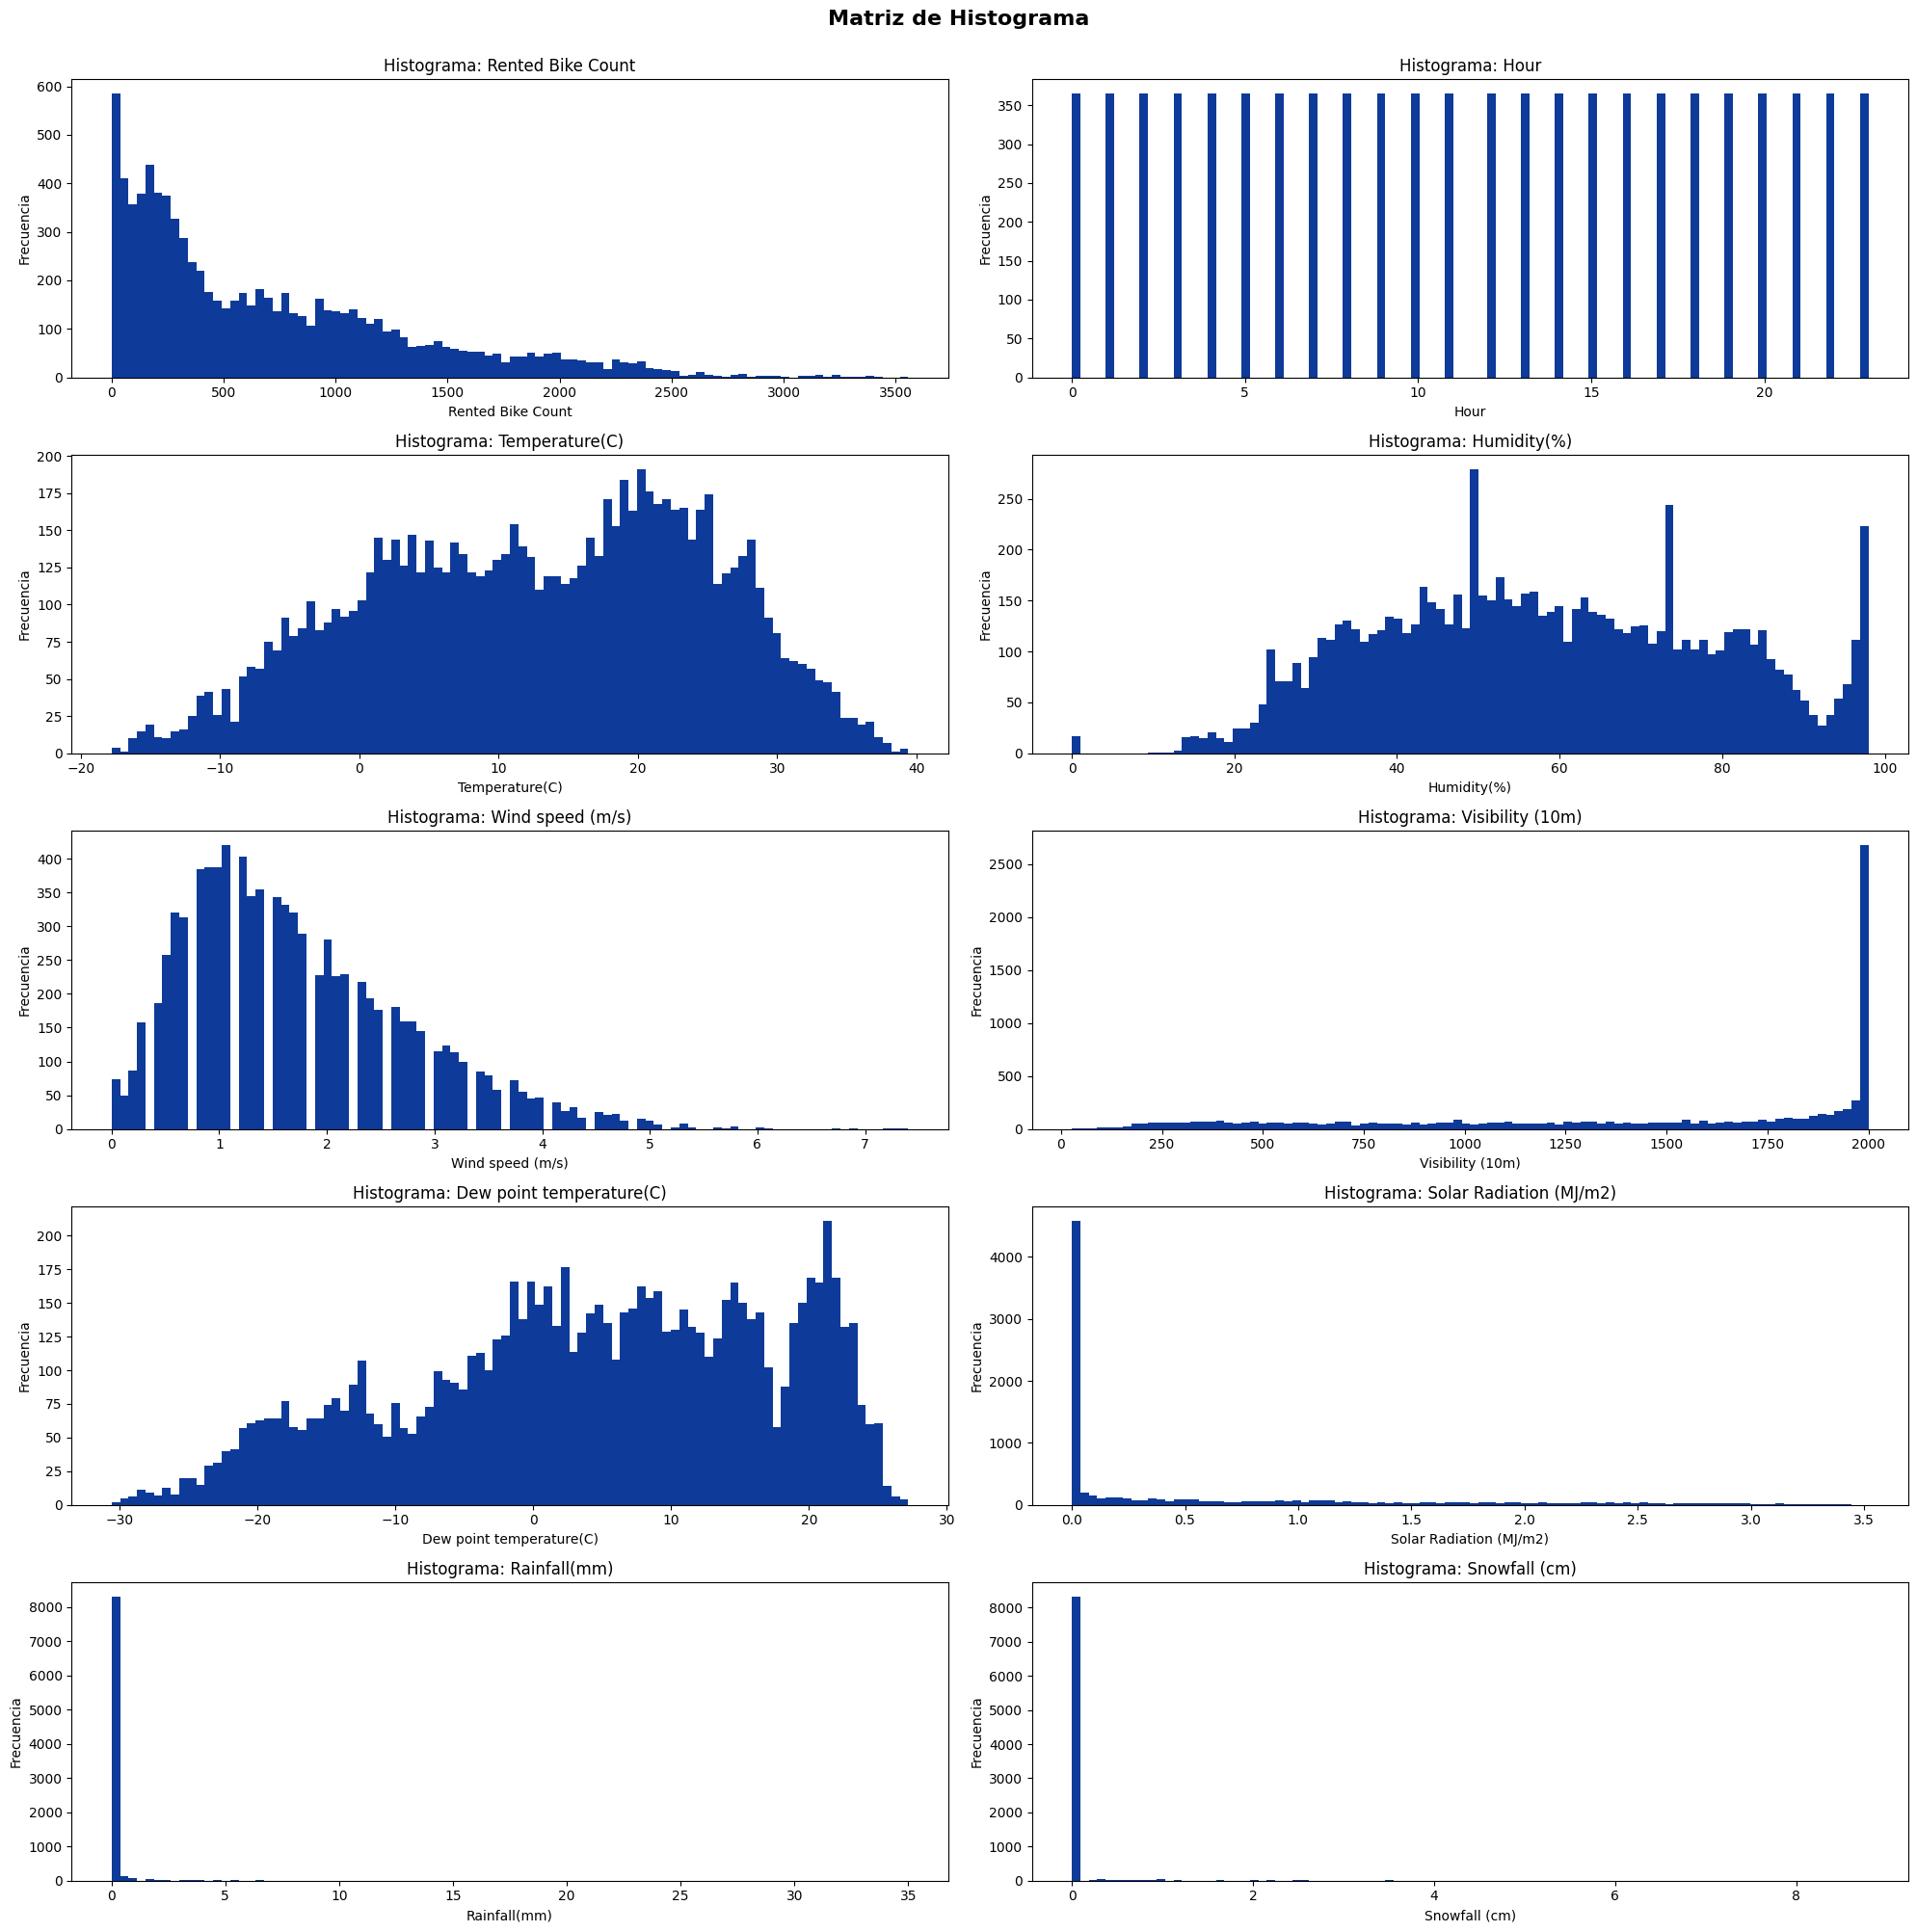

In [11]:
matriz_graficas(df=df2,r=5,c=2, y="Rented Bike Count",tipo="histograma", titulo="Histograma")

Matriz de Violin

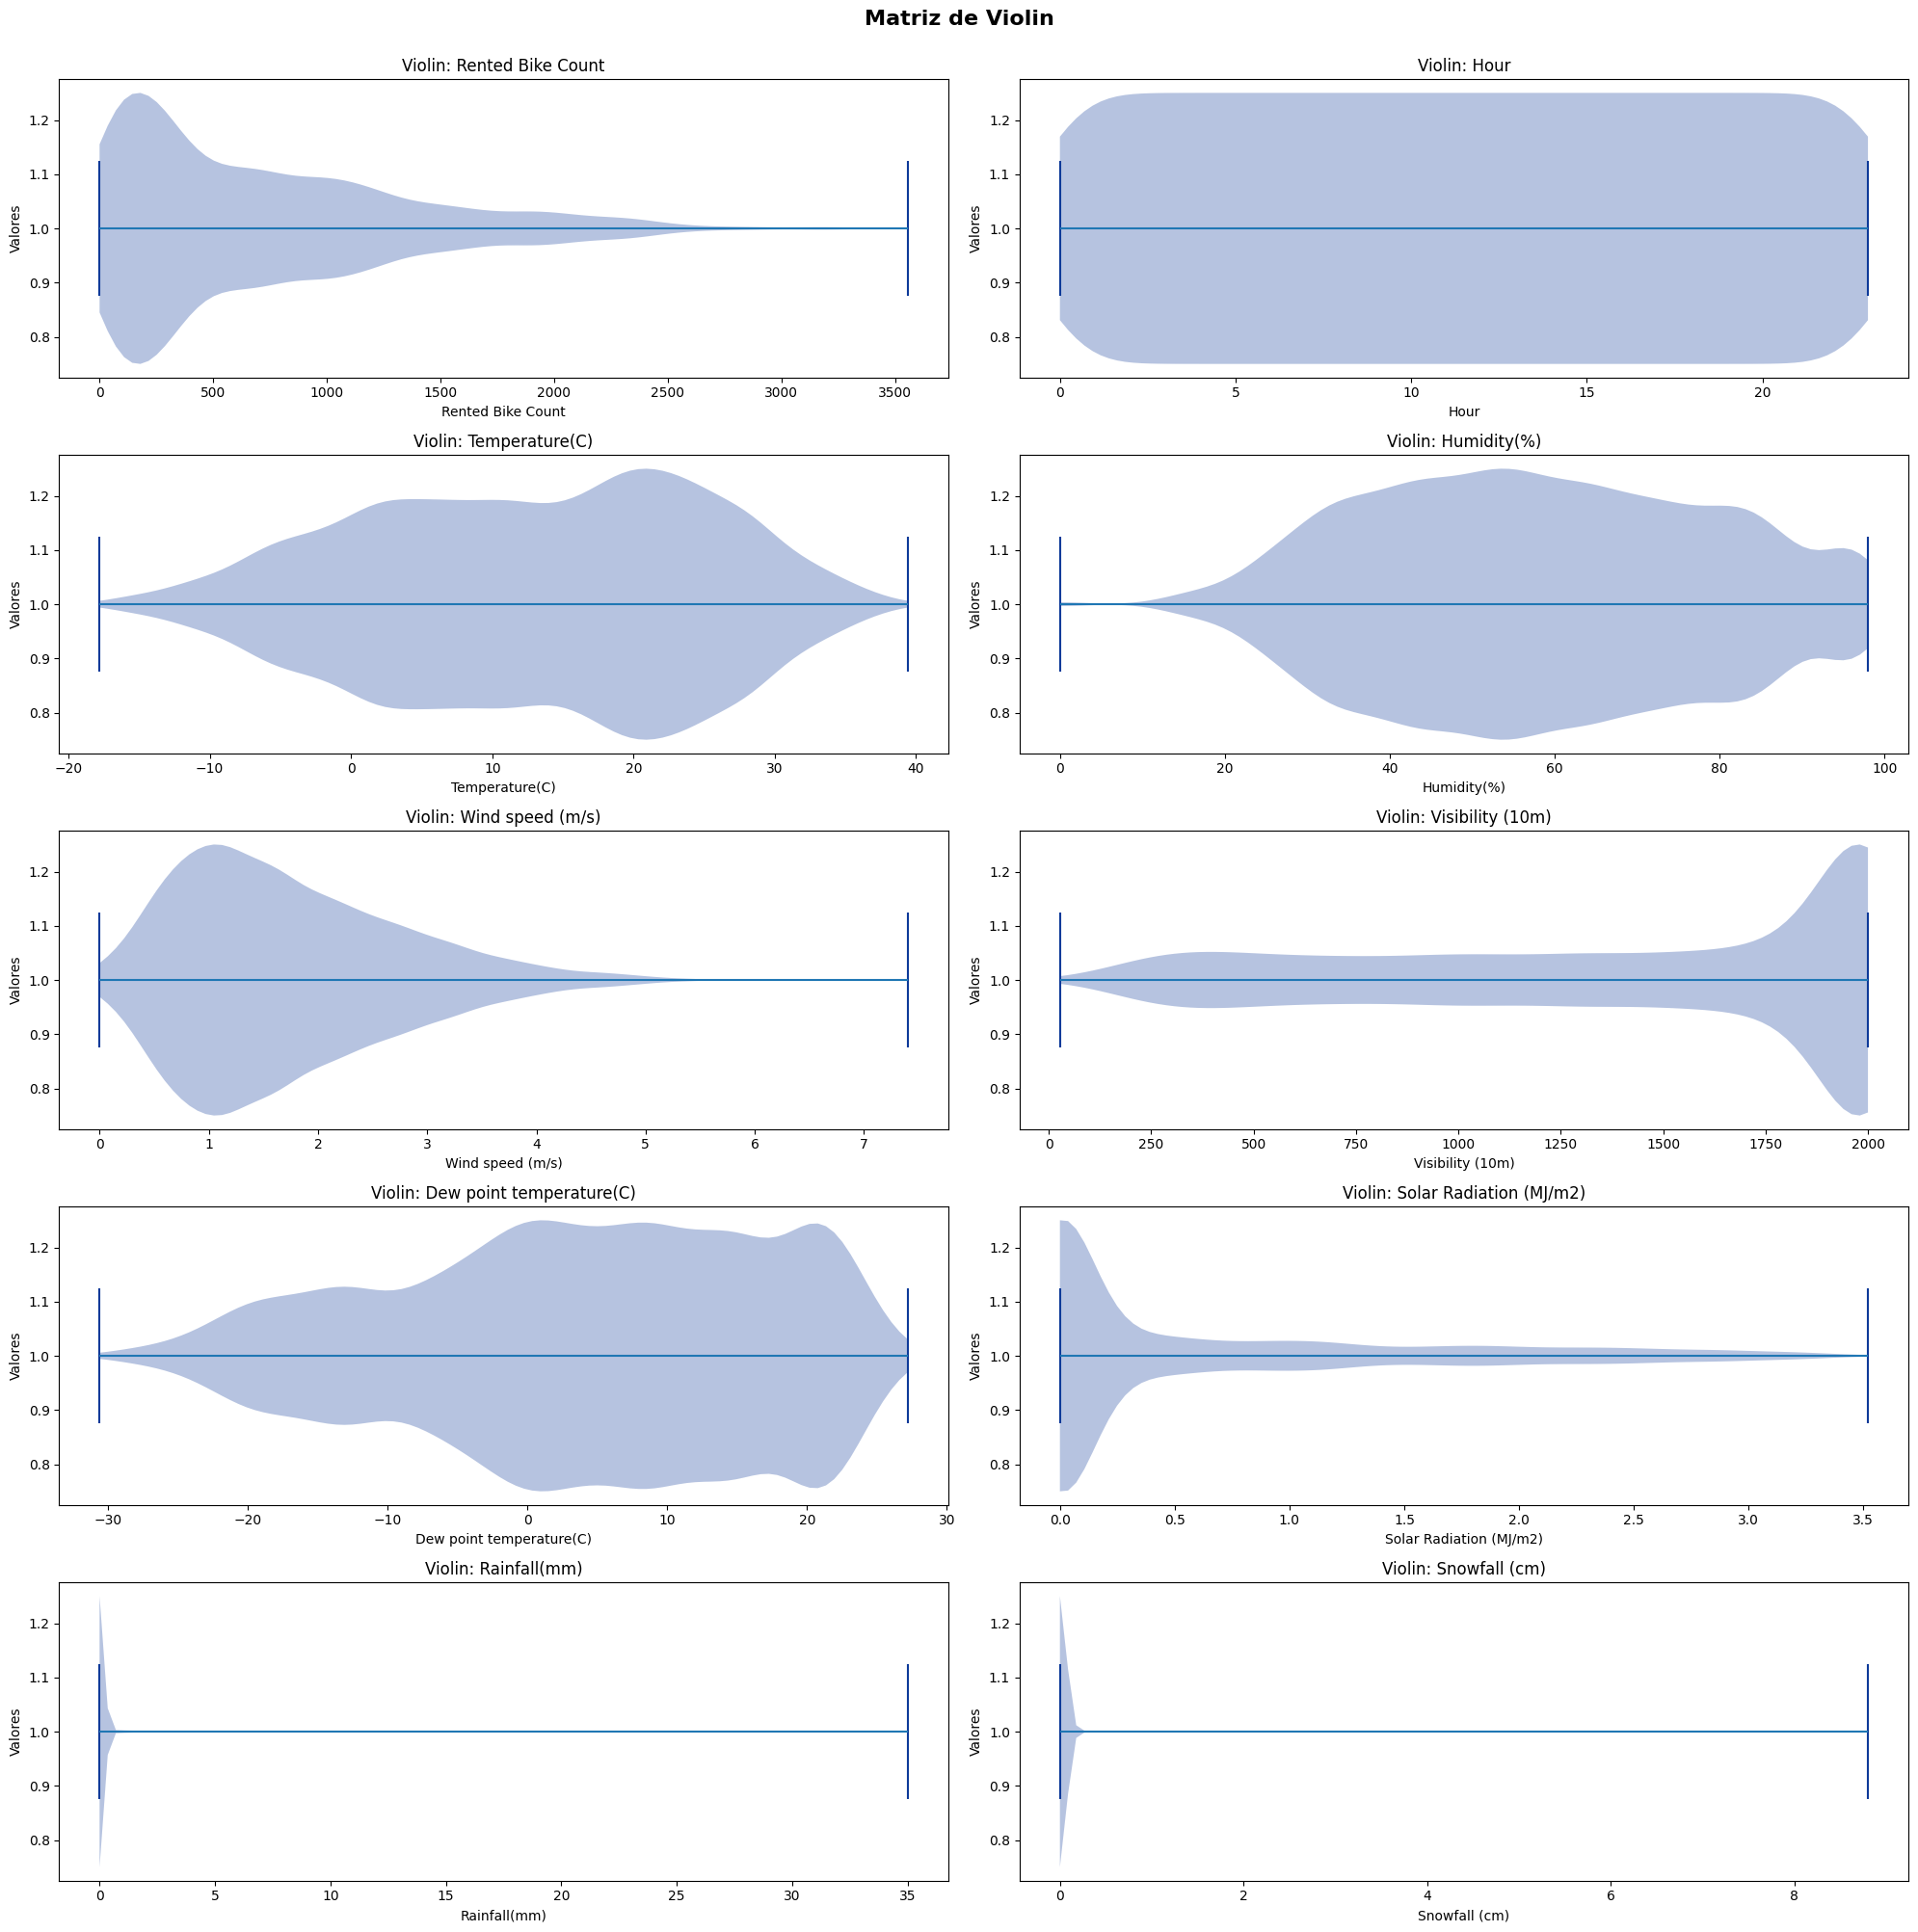

In [12]:
matriz_graficas(df=df2,r=5,c=2, y="Rented Bike Count",tipo="violin", titulo="Violin")

Matriz de Diagramas de Caja (numericas)

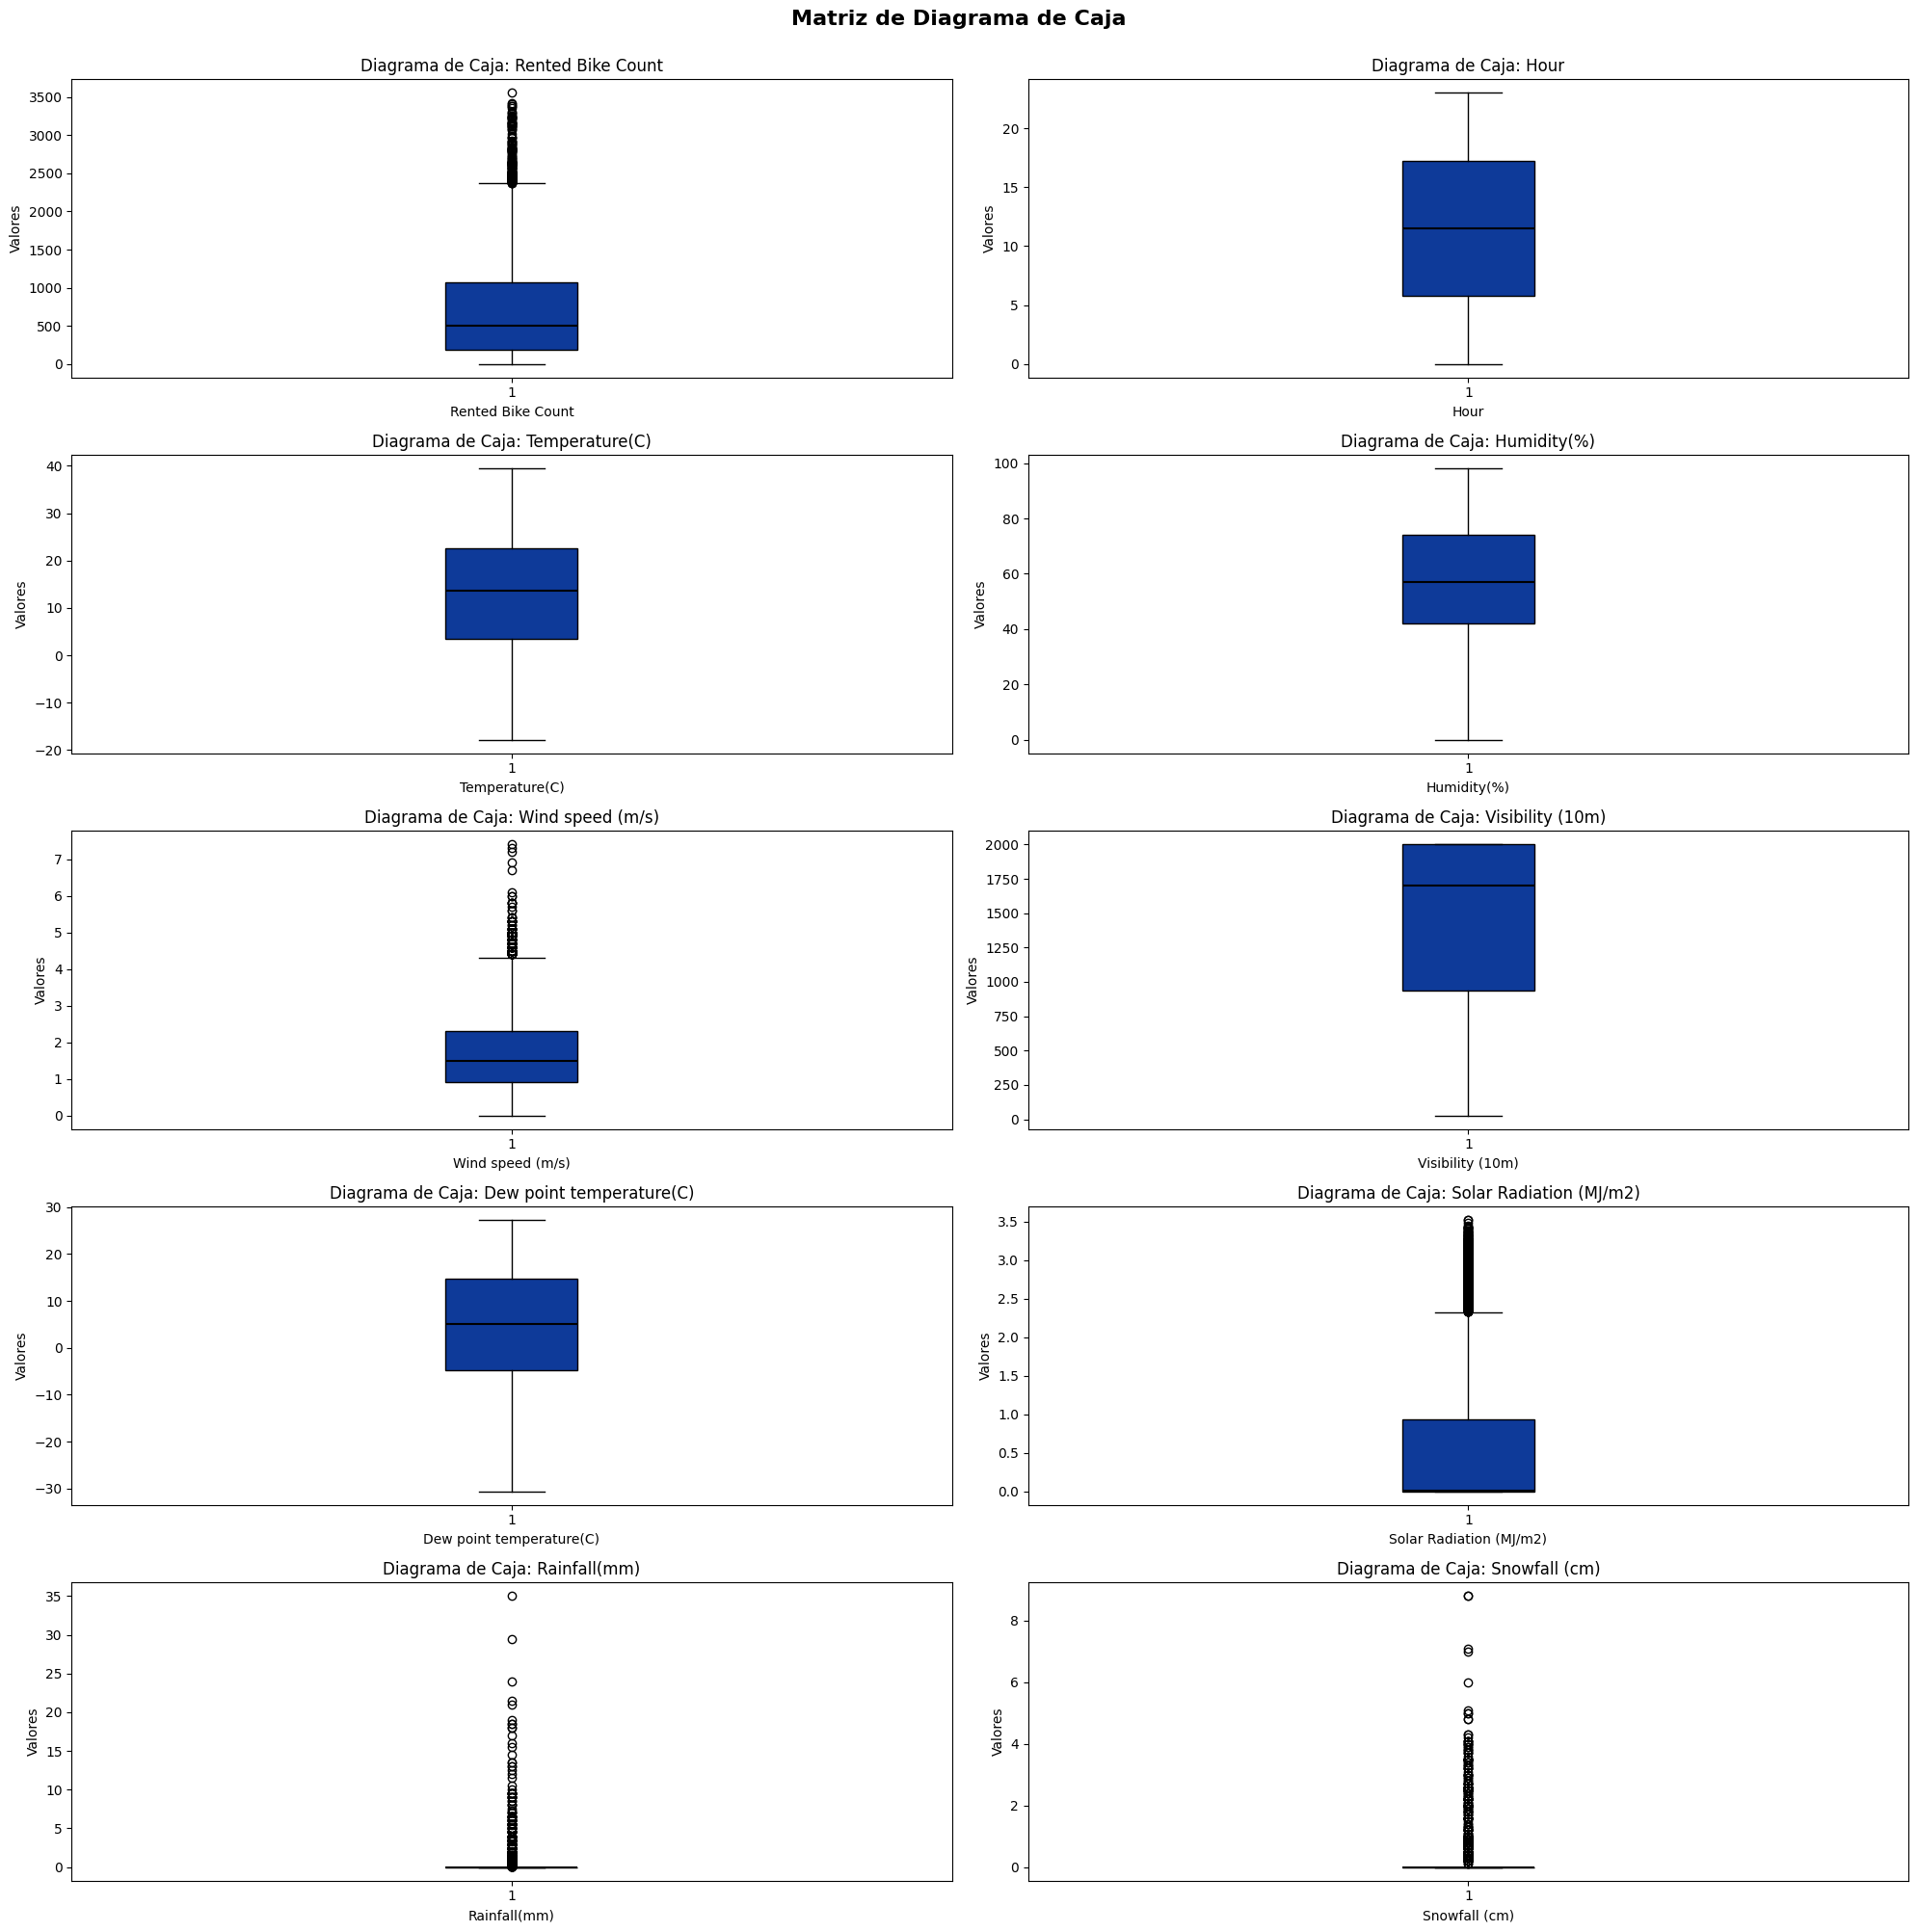

In [13]:
matriz_graficas(df=df2,r=5,c=2, y="Rented Bike Count",tipo="caja", titulo="Diagrama de Caja")

Diagrama de Cajas Seasons (categoricas)

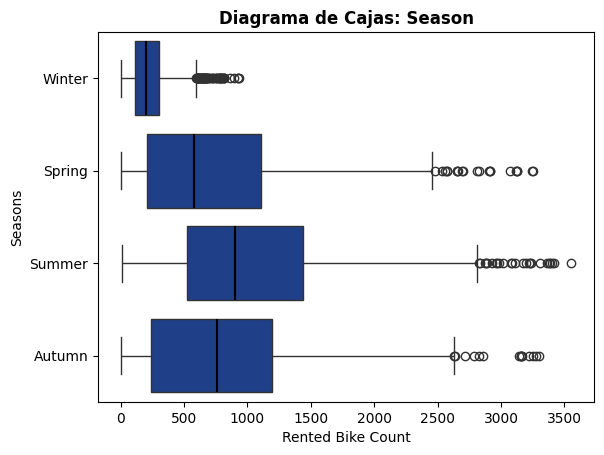

In [14]:
box = sns.boxplot(data=df, y="Seasons", x="Rented Bike Count", orient="h" , color="#0e3a99",medianprops=dict(color="black", linewidth=1.5))
kwargs = { "weight": "bold", "fontsize": "15"}
box.set_title("Diagrama de Cajas: Season", weight="bold");

Diagrama de Cajas Holidays (categoricas)

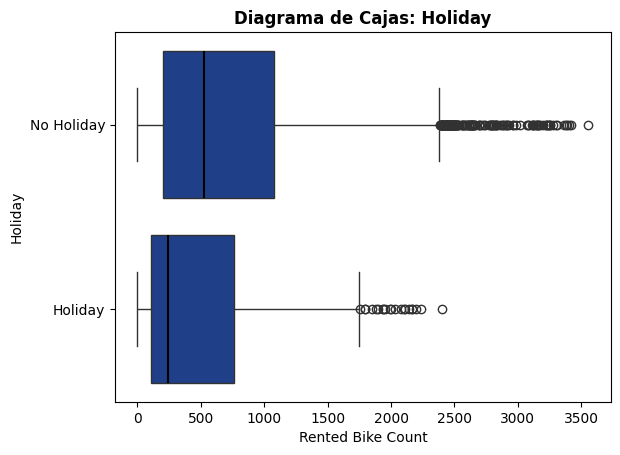

In [15]:
box = sns.boxplot(data=df, y="Holiday", x="Rented Bike Count", orient="h", color="#0e3a99",medianprops=dict(color="black", linewidth=1.5))
kwargs = { "weight": "bold", "fontsize": "15"}
box.set_title("Diagrama de Cajas: Holiday", weight="bold");

Matriz de Regresion Lineal

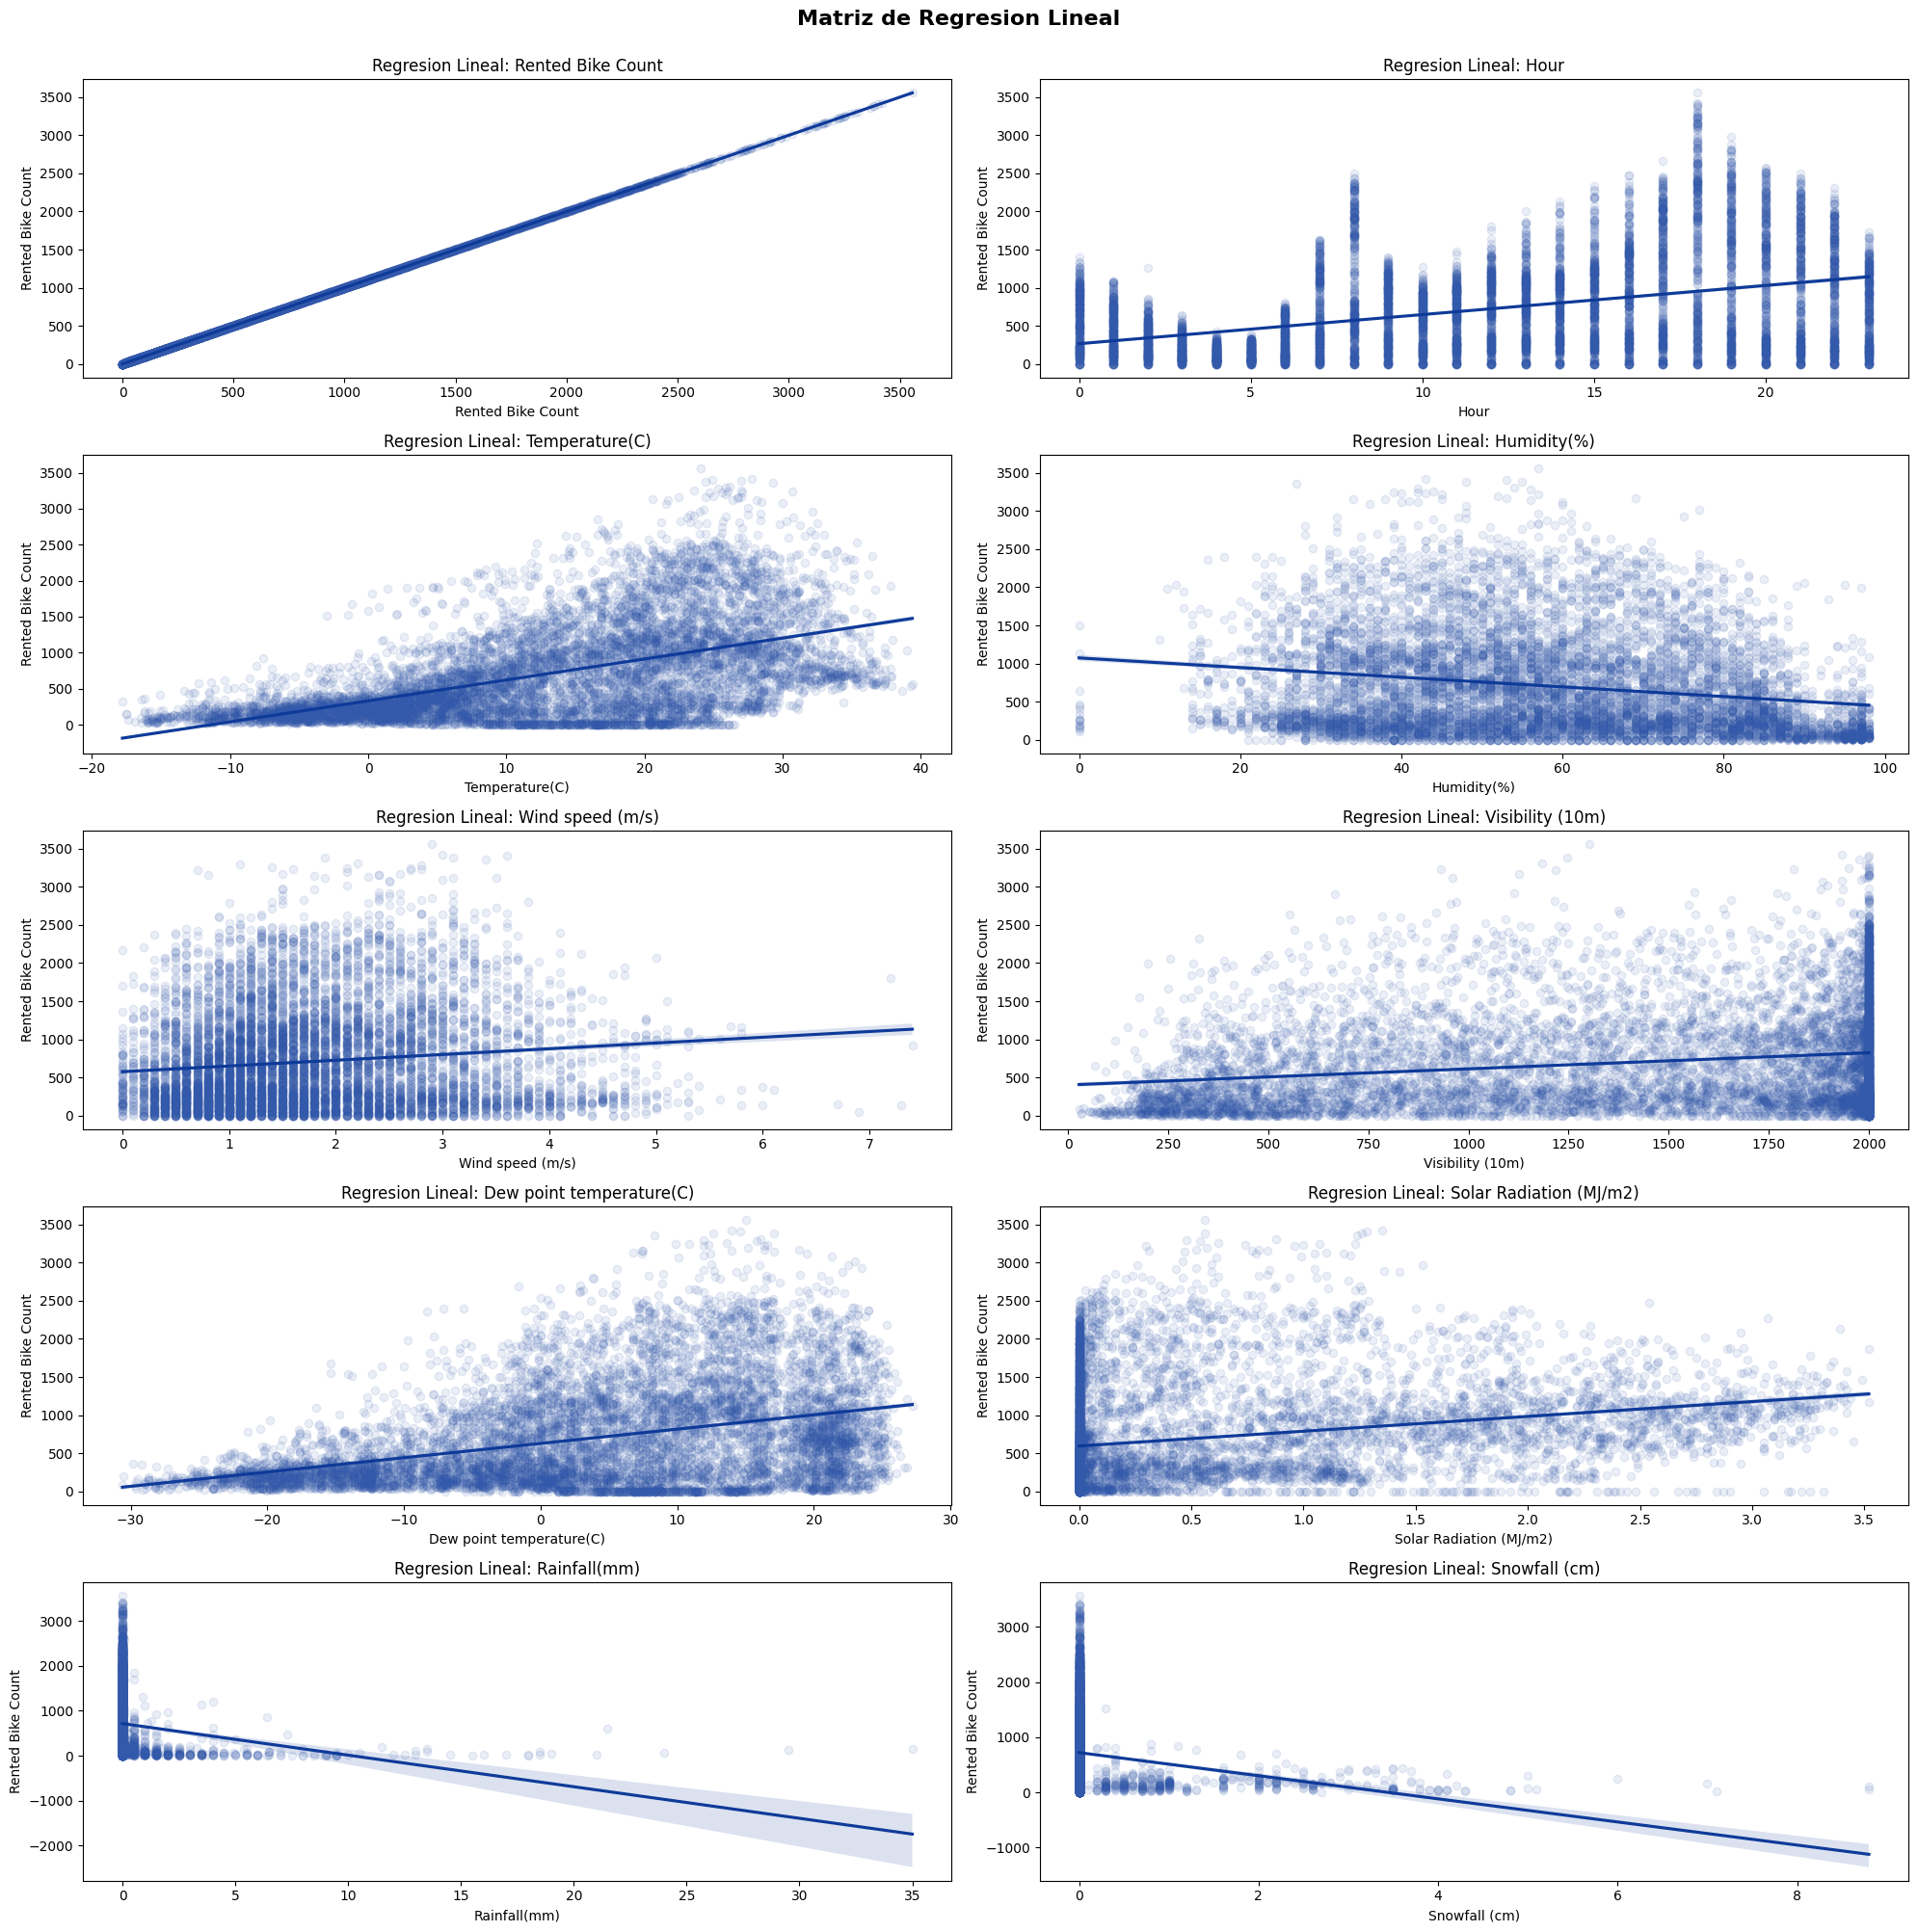

In [16]:
matriz_graficas(df=df2,r=5,c=2, y="Rented Bike Count",tipo="reg", titulo="Regresion Lineal")

Matriz de Analisis de Comportamiento de Distribucion de Variables Continuas y Analisis Bivariado

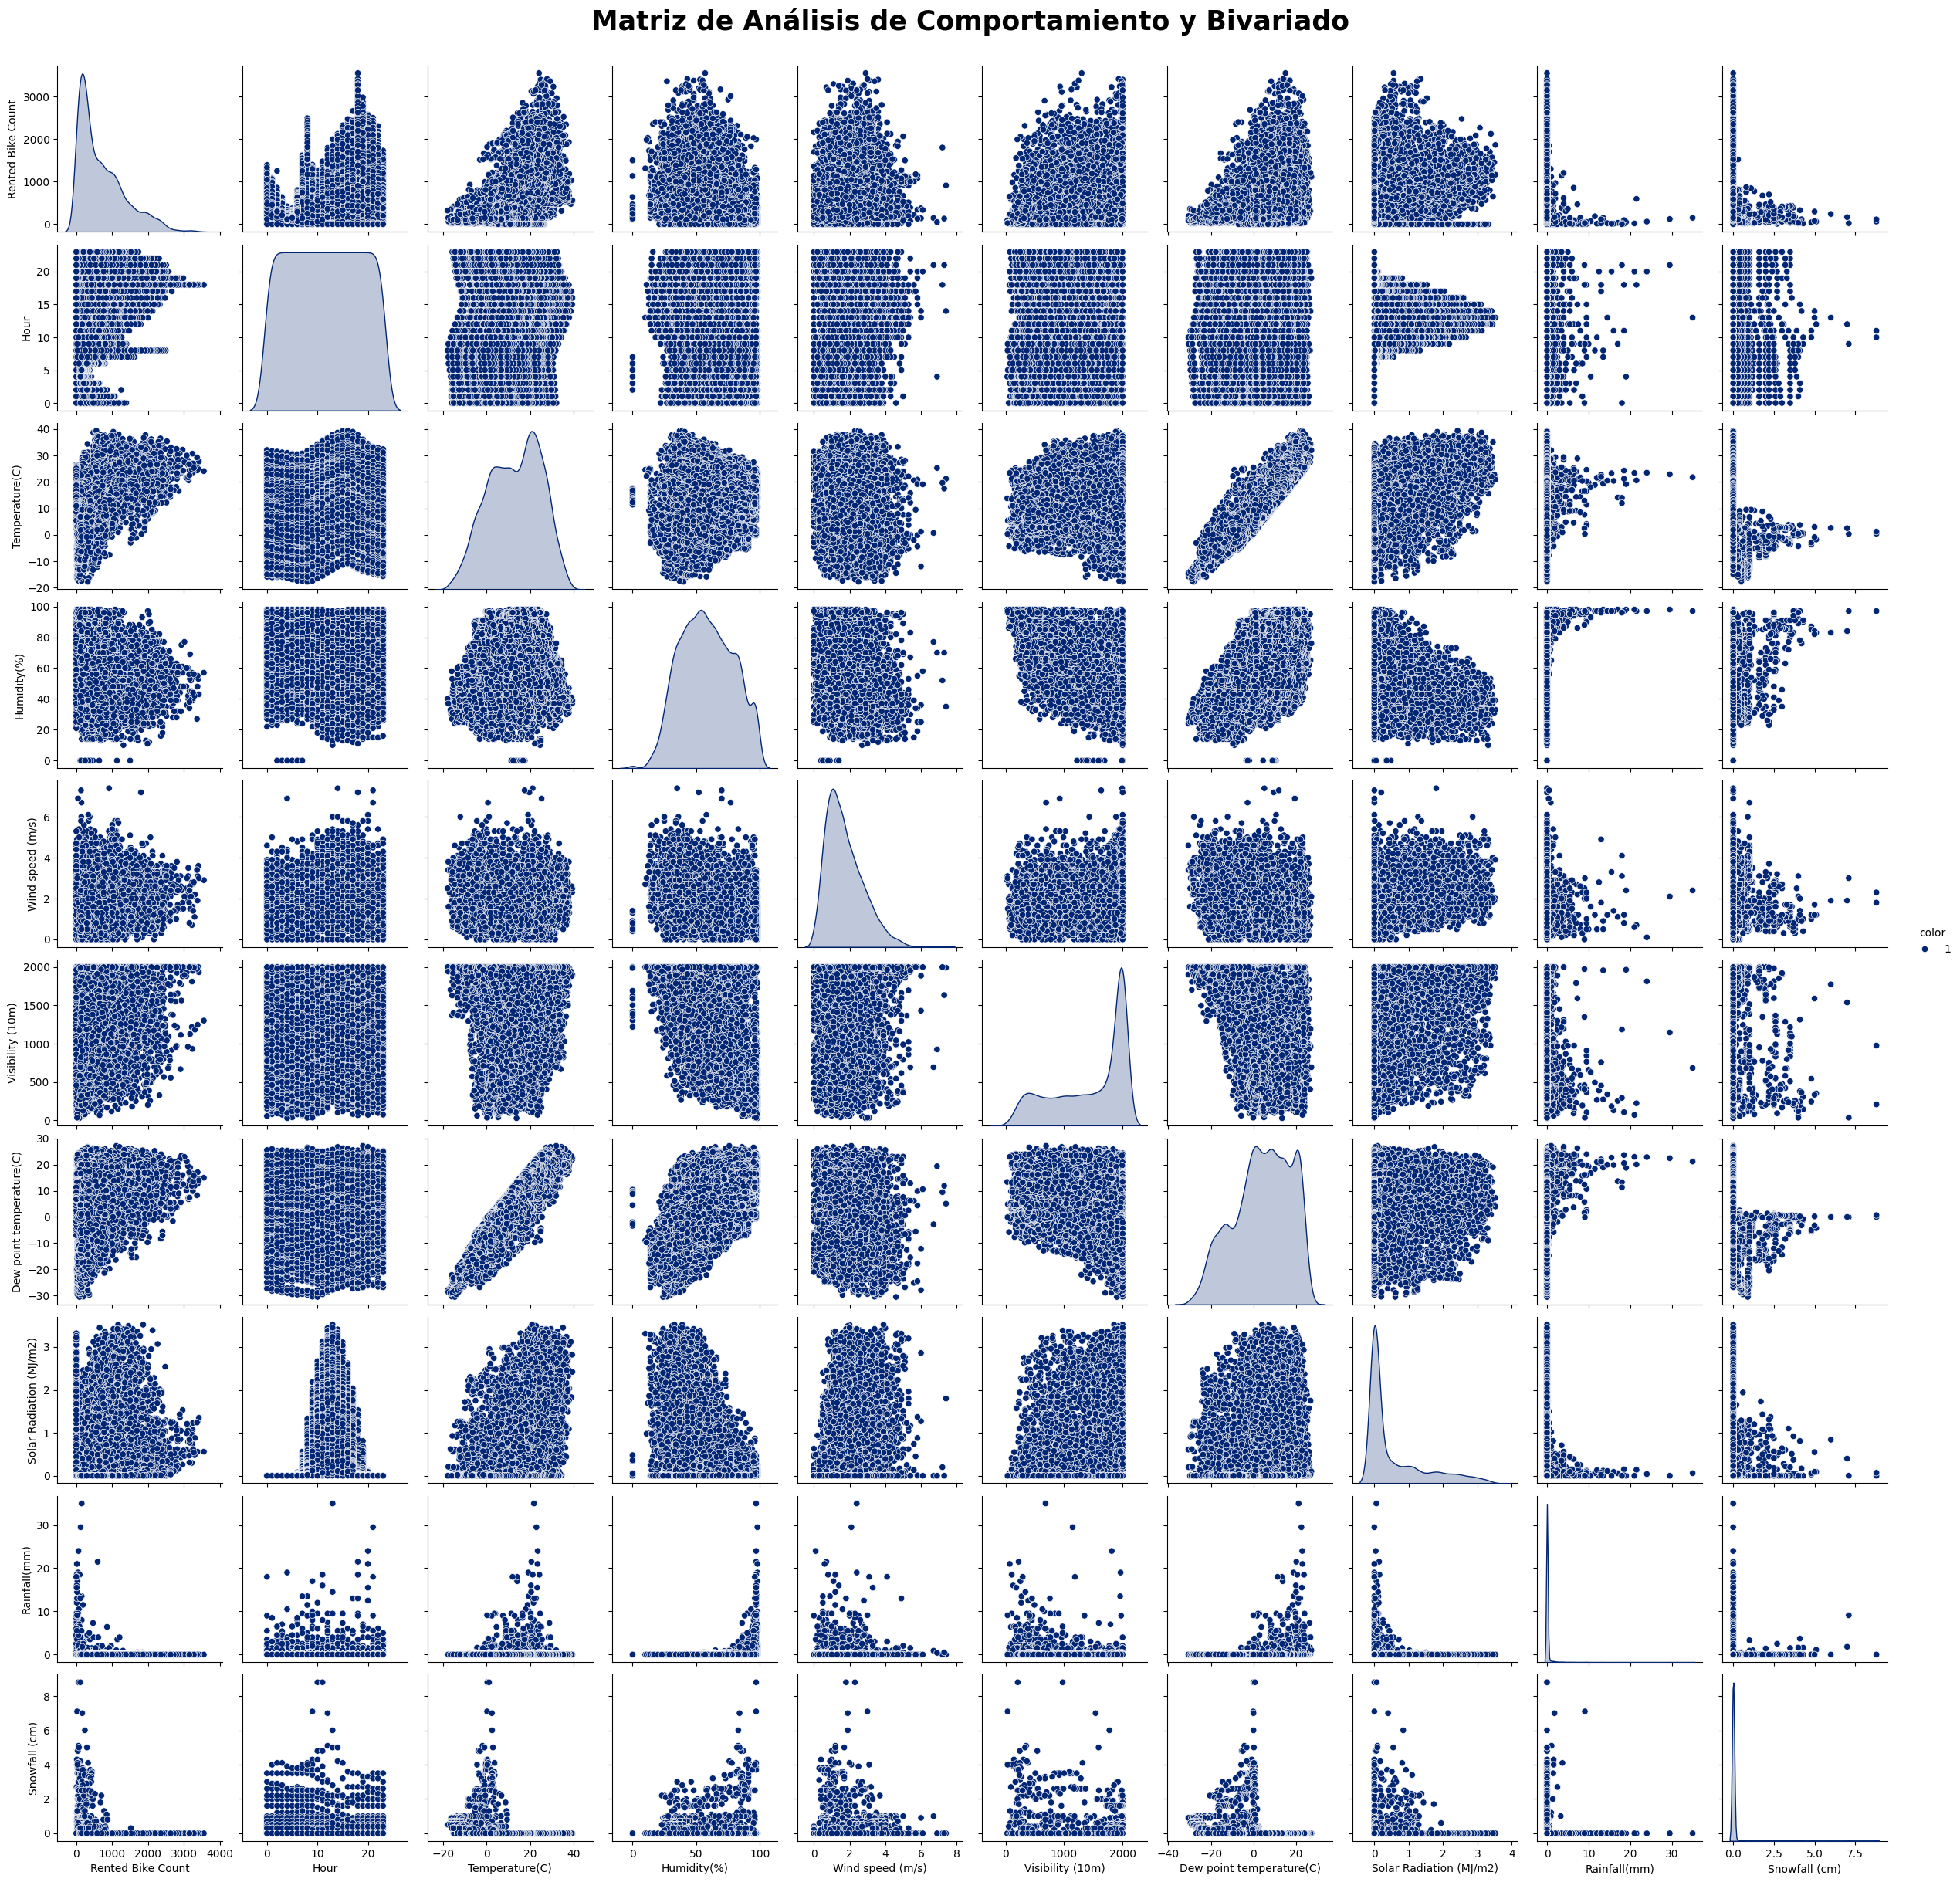

In [17]:
import statsmodels.api as sm

# colores
palette= ["#022673"]
palette_grad = ["#031438","#0b2254","#022673","#3359ab","#0e3a99", "#022673","#0b2254","#031438"]

# Agregar el hue para poder cambiarle el color mapa
df2["color"]=1

# Grafica Pairplot
ax = sns.pairplot(df2, palette=palette,hue="color")
ax.figure.subplots_adjust(top=0.95)
ax.figure.suptitle("Matriz de Análisis de Comportamiento y Bivariado", fontsize = 25, weight = "bold");

Matriz de Correlación entre las variables explicativas y con la variable de respuesta.

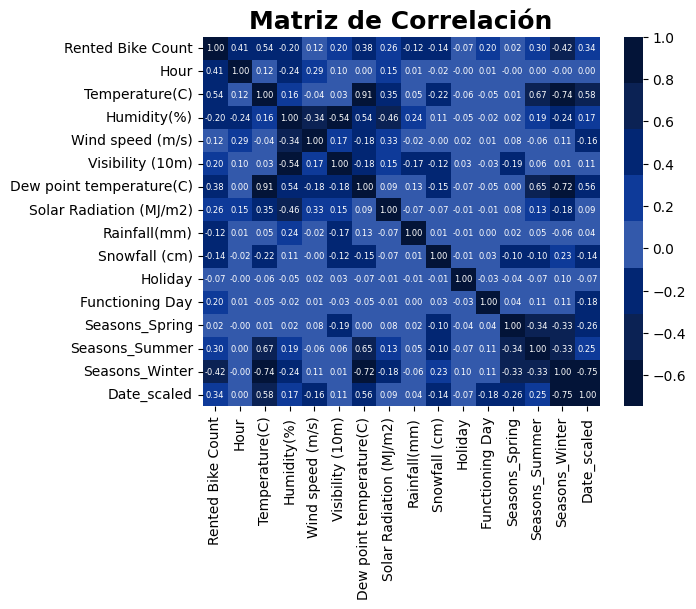

In [18]:
# Matriz de Correlación
corr = data.corr()
fig = sns.heatmap(corr, cmap=palette_grad, annot=True, fmt=".2f",annot_kws={"size": 6})
fig.set_title("Matriz de Correlación", fontdict={"color": "black", "weight": "bold", "fontsize": "18"});

Exploración bivariada de correalación entre cada varaible explicativa y la variable de respuesta

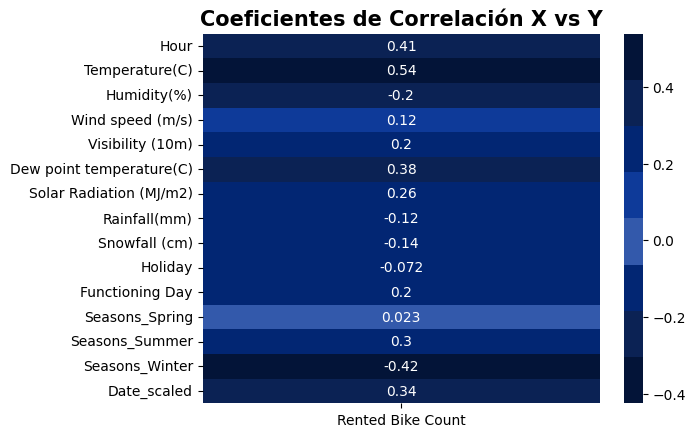

In [21]:
# Correalacion entre variables de respuesta y varaibles explicativas
corrw = data.drop(["Rented Bike Count"], axis=1).corrwith(data["Rented Bike Count"])
fig = sns.heatmap(pd.DataFrame(corrw), cmap=palette_grad, annot=True, xticklabels=["Rented Bike Count"])
fig.set_title("Coeficientes de Correlación X vs Y", fontdict={"color": "black", "weight": "bold", "fontsize": "15"});

Análisis Exploratorio Multivariado (x=Temperature, y=Hour, z=Rented Bike Count)

In [22]:
import plotly.express as px
fig = px.scatter_3d(df, x=df["Temperature(C)"], y=df["Hour"], z=df["Rented Bike Count"], size="Rented Bike Count", opacity=1)
fig.update_layout(title="Análisis Exploratorio Multivariado")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Tarea 4 - Modelamiento

Ingeniería de características:

In [23]:
# Seleccionar las características relevantes

Separar los datos:

In [24]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características y variable objetivo
X = data.drop(columns=['Rented Bike Count'])
Y = data[['Rented Bike Count']]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Implementación:

Modelos de regresión lineal

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Definir los modelos
models = {
    'Lineal': LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
}
trained_models = {}
for name, model in models.items():
       
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir con el modelo entrenado
    y_pred = model.predict(X_test)

    trained_models[name] = model

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir reporte
    print(f"Modelo: {name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("-" * 30)


Modelo: Lineal
Mean Squared Error (MSE): 193984.3467
R^2 Score: 0.5344
------------------------------
Modelo: Ridge
Mean Squared Error (MSE): 193863.2305
R^2 Score: 0.5347
------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.461e+06, tolerance: 2.914e+05



Modelo: Lasso
Mean Squared Error (MSE): 193832.3364
R^2 Score: 0.5348
------------------------------
Modelo: ElasticNet
Mean Squared Error (MSE): 203125.6902
R^2 Score: 0.5125
------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.185e+06, tolerance: 2.914e+05



Más modelos

### Tarea 5 - Diseño y Desarrollo del Tablero

In [56]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso

# Crear la aplicación Dash
app = dash.Dash(__name__)

# Definir el diseño del tablero
app.layout = html.Div([
    html.H1("Predicción de Rentas de Bicicletas", style={'textAlign': 'center', 'color': '#333'}),
    html.Div([
        html.Label('Temporada:'),
        dcc.Dropdown(
            id='season-dropdown',
            options=[
                {'label': 'Primavera', 'value': 'Spring'},
                {'label': 'Verano', 'value': 'Summer'},
                {'label': 'Otoño', 'value': 'Autumn'},
                {'label': 'Invierno', 'value': 'Winter'}
            ],
            value='Primavera',
            style={'marginBottom': '10px'}
        ),
        html.Label('¿Es un día festivo?:'),
        dcc.RadioItems(
            id='holiday-radio',
            options=[
                {'label': 'Sí', 'value': 1},
                {'label': 'No', 'value': 0}
            ],
            value=0,
            style={'marginBottom': '10px'}
        ),
        html.Label('Temperatura (C):'),
        dcc.Input(id='temp-input', type='number', value=20, style={'marginBottom': '10px'}),
        html.Label('Humedad (%):'),
        dcc.Input(id='humidity-input', type='number', value=50, style={'marginBottom': '10px'}),
        html.Label('Velocidad del viento (m/s):'),
        dcc.Input(id='wind-input', type='number', value=5, style={'marginBottom': '10px'}),
        html.Label('Visibilidad (10m):'),
        dcc.Input(id='visibility-input', type='number', value=1000, style={'marginBottom': '10px'}),
    ], style={'padding': '20px', 'backgroundColor': '#f9f9f9', 'borderRadius': '10px'}),
    html.Div(id='prediction-output'),
], style={'backgroundColor': 'white', 'padding': '50px'})

# Callback para realizar predicciones
@app.callback(
    Output('prediction-output', 'children'),
    [Input('season-dropdown', 'value'),
     Input('holiday-radio', 'value'),
     Input('temp-input', 'value'),
     Input('humidity-input', 'value'),
     Input('wind-input', 'value'),
     Input('visibility-input', 'value')]
)
def update_prediction(season, holiday, temp, humidity, wind_speed, visibility):
    # Crear un DataFrame con las entradas del usuario
    input_data = pd.DataFrame({
        'Temperature(C)': [temp],
        'Humidity(%)': [humidity],
        'Wind speed(m/s)': [wind_speed],
        'Visibility(10m)': [visibility],
        'Holiday': [holiday],
        'Season_Spring': [1 if season == 'Spring' else 0],
        'Season_Summer': [1 if season == 'Summer' else 0],
        'Season_Autumn': [1 if season == 'Autumn' else 0],
        'Season_Winter': [1 if season == 'Winter' else 0]
    })

    # Hacer la predicción
    prediction = model.predict(input_data)[0]

    return html.Div([
        html.H5('Predicción de Rentas de Bicicletas'),
        html.Label(f'Cantidad estimada de bicicletas rentadas: {int(prediction)}')
    ])

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[56], line 73, in update_prediction(
    season='Summer',
    holiday=1,
    temp=30,
    humidity=None,
    wind_speed=5,
    visibility=1000
)
     60 input_data = pd.DataFrame({
     61     'Temperature(C)': [temp],
     62     'Humidity(%)': [humidity],
   (...)
     69     'Season_Winter': [1 if season == 'Winter' else 0]
     70 })
     72 # Hacer la predicción
---> 73 prediction = model.predict(input_data)[0]
        input_data =    Temperature(C) Humidity(%)  Wind speed(m/s)  Visibility(10m)  Holiday  \
0              30        None                5             1000        1   

   Season_Spring  Season_Summer  Season_Autumn  Season_Winter  
0              0              1              0              0  
        model = Lasso(alpha=0.1)
     75 return html.Div([
     76     html.H5('Predicción de Rentas de Bicicletas'),
 